In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('Bank_Transaction_Fraud_Detection.csv')
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [4]:
df.isnull().sum()

Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64

In [5]:
df.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,44.015110,49538.015554,52437.988784,0.050440
std,15.288774,28551.874004,27399.507128,0.218852
min,18.000000,10.290000,5000.820000,0.000000
25%,31.000000,24851.345000,28742.395000,0.000000
50%,44.000000,49502.440000,52372.555000,0.000000
75%,57.000000,74314.625000,76147.670000,0.000000
max,70.000000,98999.980000,99999.950000,1.000000


C:\Users\Mauro Jorge Ernesto\AppData\Local\Temp\ipykernel_14016\1878643831.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_count.index, y=fraud_count.values, palette=['green', 'red'])


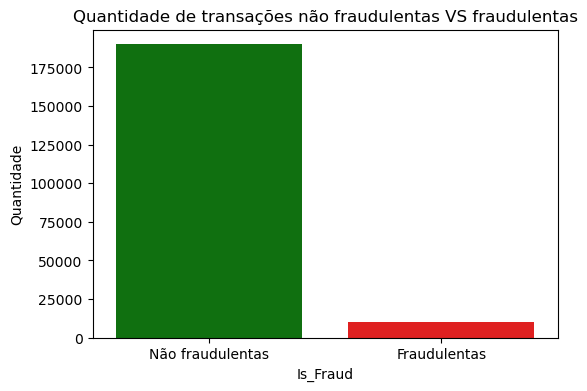

In [6]:
fraud_count = df['Is_Fraud'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_count.index, y=fraud_count.values, palette=['green', 'red'])
plt.title("Quantidade de transações não fraudulentas VS fraudulentas")
plt.xticks(ticks=[0, 1], labels=['Não fraudulentas', 'Fraudulentas'])
plt.ylabel("Quantidade")
plt.show()

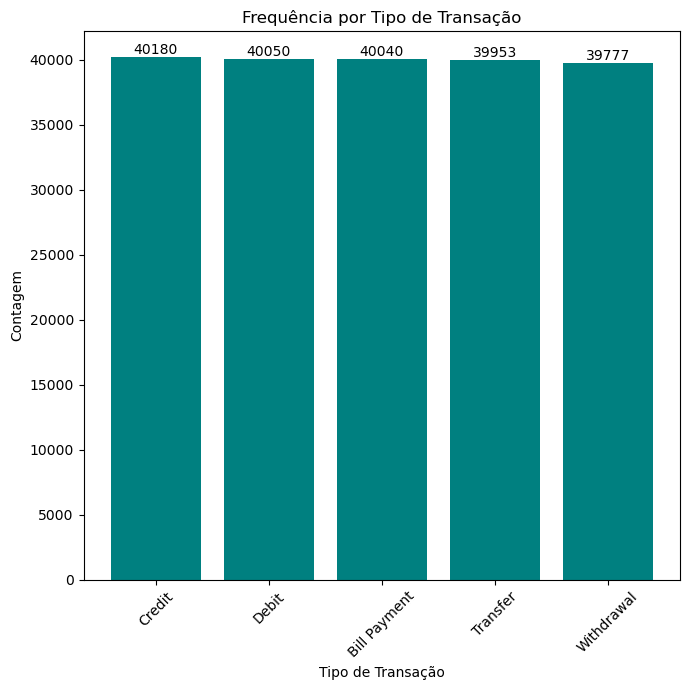

In [7]:
# Contagem dos tipos de transação
transaction_counts = df['Transaction_Type'].value_counts()

# Gráfico de barras com rótulos
plt.figure(figsize=(7,7))
bars = plt.bar(transaction_counts.index, transaction_counts.values, color='teal')

# Adicionando os rótulos acima das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height),
             ha='center', va='bottom', fontsize=10)

plt.title("Frequência por Tipo de Transação")
plt.xlabel("Tipo de Transação")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

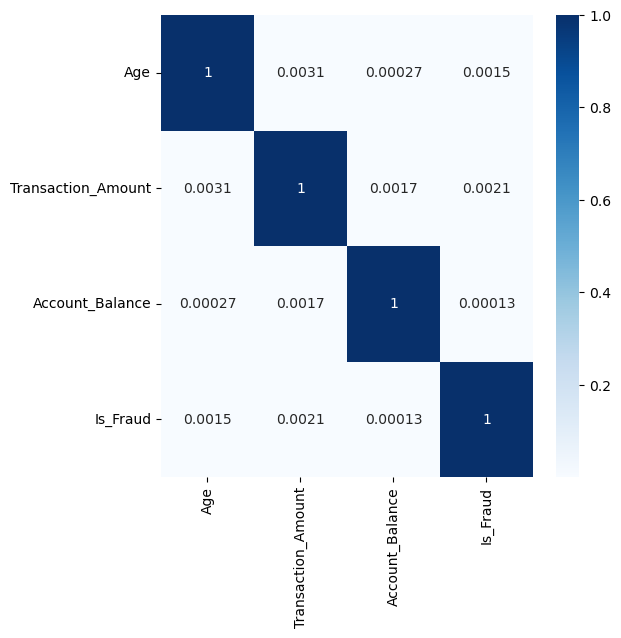

In [8]:
#Verificar a correlaçõa entre as variaveis
corr = df.select_dtypes('number').corr()

fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corr.abs(), cmap='Blues', annot=True)
plt.show()

In [9]:
df.dtypes

Customer_ID                 object
Customer_Name               object
Gender                      object
Age                          int64
State                       object
City                        object
Bank_Branch                 object
Account_Type                object
Transaction_ID              object
Transaction_Date            object
Transaction_Time            object
Transaction_Amount         float64
Merchant_ID                 object
Transaction_Type            object
Merchant_Category           object
Account_Balance            float64
Transaction_Device          object
Transaction_Location        object
Device_Type                 object
Is_Fraud                     int64
Transaction_Currency        object
Customer_Contact            object
Transaction_Description     object
Customer_Email              object
dtype: object

## Separação as Features e Target

In [10]:
colunas_nume = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print('Colunas numerícas:', colunas_nume)

Colunas numerícas: ['Age', 'Transaction_Amount', 'Account_Balance', 'Is_Fraud']


In [11]:
colunas_categ = df.select_dtypes(include=['object']).columns.tolist()

print("Colunas categoricas:", colunas_categ)

Colunas categoricas: ['Customer_ID', 'Customer_Name', 'Gender', 'State', 'City', 'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date', 'Transaction_Time', 'Merchant_ID', 'Transaction_Type', 'Merchant_Category', 'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Transaction_Currency', 'Customer_Contact', 'Transaction_Description', 'Customer_Email']


In [12]:
#Aplicando LabelEncoder nas colunas categoricas 
le = LabelEncoder()
colunas_categoricas = ['Gender', 'Bank_Branch', 'Account_Type', 'Transaction_Type', 'Merchant_Category',
'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Transaction_Currency', 'Transaction_Description']
for col in colunas_categoricas:
    df[col] = le.fit_transform(df[col])

In [13]:
# Aplicando Standardize nas colunas numericas
scaler = StandardScaler()
colunas_numericas = ['Age', 'Transaction_Amount']
df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])

In [14]:
features = ['Age', 'Transaction_Amount', 'Gender', 'Bank_Branch', 'Account_Type', 'Transaction_Type', 'Merchant_Category',
'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Transaction_Currency', 'Transaction_Description']

target = 'Is_Fraud'

In [15]:
X = df[features]
y = df[target]

In [16]:
#Separando os dados de teste e treinamento
X_test, X_train, y_test, y_train = train_test_split(X, y, random_state=42, test_size=0.3)

## Balanceando as classes usando o SMOTE (somente no conjunto de treinamento)

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
smote = SMOTE(random_state=42)
X_train_balanc, y_train_balanc = smote.fit_resample(X_train, y_train)

C:\Users\Mauro Jorge Ernesto\AppData\Local\Temp\ipykernel_14016\486526468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_count.index, y=fraud_count_balanc.values, palette=['green', 'red'])


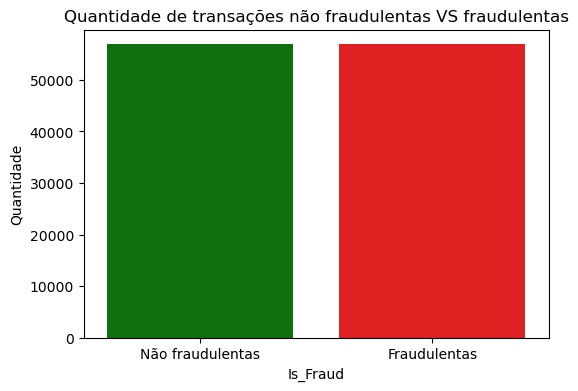

In [19]:
fraud_count_balanc = y_train_balanc.value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_count.index, y=fraud_count_balanc.values, palette=['green', 'red'])
plt.title("Quantidade de transações não fraudulentas VS fraudulentas")
plt.xticks(ticks=[0, 1], labels=['Não fraudulentas', 'Fraudulentas'])
plt.ylabel("Quantidade")
plt.show()

## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_RF = RandomForestClassifier(class_weight='balanced', n_estimators=150, random_state=42)
model_RF.fit(X_train_balanc, y_train_balanc)

In [ ]:
y_pred_RF = model_RF.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92    132983
           1       0.05      0.11      0.07      7017

    accuracy                           0.85    140000
   macro avg       0.50      0.50      0.50    140000
weighted avg       0.91      0.85      0.88    140000



## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_XGB = XGBClassifier(n_estimators=100, random_state=42)
model_XGB.fit(X_train_balanc, y_train_balanc)
y_pred_XGB = model_XGB.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_XGB))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94    132983
           1       0.05      0.07      0.06      7017

    accuracy                           0.88    140000
   macro avg       0.50      0.50      0.50    140000
weighted avg       0.90      0.88      0.89    140000



## Arvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_AD = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model_AD.fit(X_train_balanc, y_train_balanc)
y_pred_AD = model_AD.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_AD))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92    132983
           1       0.05      0.13      0.08      7017

    accuracy                           0.85    140000
   macro avg       0.50      0.50      0.50    140000
weighted avg       0.91      0.85      0.87    140000



## Apresentar o resultados dos modelos no gráfico

In [ ]:
# Apresentar o resultados dos modelos no gráfico 
models = ['Random Forest', 'XGBoost', 'Decision Tree']
accuracies = [0.85 , 0.88, 0.85]

# Criar o gráfico de barras
fig = px.bar(x=models, y=accuracies, labels={'x': 'Models', 'y': 'Accuracy'},
             title="Performance of the models", text=accuracies)

# Personalizar o layout
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside', marker_color='green')

# Mostrar o gráfico
fig.show()